In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 10000
n = 2
random_matrix = np.random.normal(0,1,(k,n))
norms = np.linalg.norm(random_matrix, axis=1)
normalized_matrix = random_matrix / norms[:, np.newaxis]

In [3]:
random_matrix

array([[ 0.79202406,  0.94222217],
       [-0.04580647,  1.28376575],
       [ 0.48762584,  0.71718189],
       ...,
       [ 0.48779152, -1.37655547],
       [-1.94643701,  0.11679416],
       [ 0.94584353,  0.51293638]])

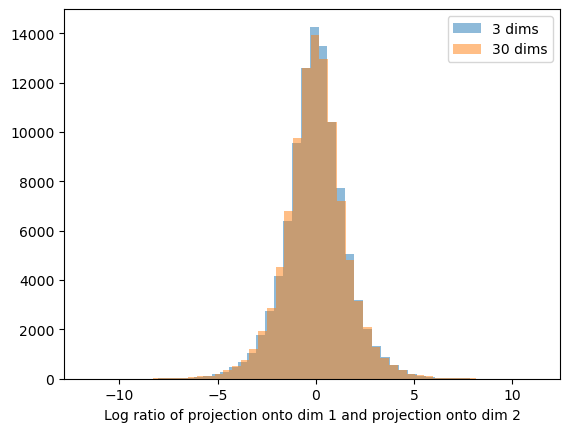

In [43]:
k = 100000
n = 3
random_matrix = np.random.normal(0,1,(k,n))
norms = np.linalg.norm(random_matrix, axis=1)
normalized_matrix = random_matrix / norms[:, np.newaxis]
plt.hist(np.log(np.abs(normalized_matrix[:,0])/np.abs(normalized_matrix[:,1])),bins = 50,alpha = 0.5,label='3 dims')
#plt.axvline(np.mean(np.abs(normalized_matrix[:,0])))
k = 100000
n = 30
random_matrix = np.random.normal(0,1,(k,n))
norms = np.linalg.norm(random_matrix, axis=1)
normalized_matrix = random_matrix / norms[:, np.newaxis]
plt.hist(np.log(np.abs(normalized_matrix[:,0])/np.abs(normalized_matrix[:,1])),bins = 50,alpha = 0.5,label='30 dims')
#plt.axvline(np.mean(np.abs(normalized_matrix[:,0])))
#plt.yscale('log')
plt.xlabel('Log ratio of projection onto dim 1 and projection onto dim 2')
plt.legend()
plt.show()


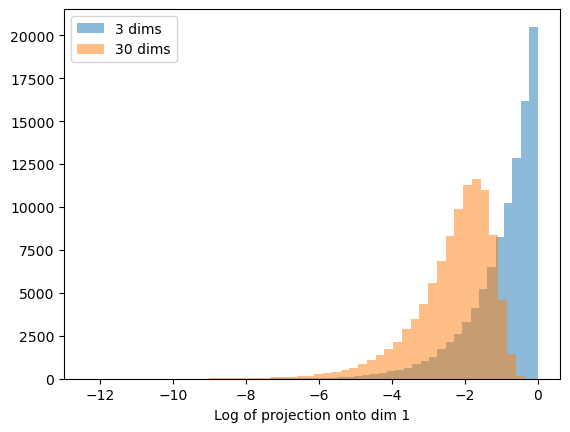

In [47]:
k = 100000
n = 3
random_matrix = np.random.normal(0,1,(k,n))
norms = np.linalg.norm(random_matrix, axis=1)
normalized_matrix = random_matrix / norms[:, np.newaxis]
plt.hist(np.log(np.abs(normalized_matrix[:,0])),bins = 50,alpha = 0.5,label='3 dims')
#plt.axvline(np.mean(np.abs(normalized_matrix[:,0])))
k = 100000
n = 30
random_matrix = np.random.normal(0,1,(k,n))
norms = np.linalg.norm(random_matrix, axis=1)
normalized_matrix = random_matrix / norms[:, np.newaxis]
plt.hist(np.log(np.abs(normalized_matrix[:,0])),bins = 50,alpha = 0.5,label='30 dims')
#plt.axvline(np.mean(np.abs(normalized_matrix[:,0])))
#plt.yscale('log')
plt.xlabel('Log of projection onto dim 1')
plt.legend()
plt.show()

In [5]:
np.mean(np.abs(normalized_matrix[:,0]))

0.14743824473201309

In [44]:
ns = [2,3,4,5,6,7,8,9,10,20,30]
resn = []
for n in ns:
    Jx = np.zeros((n,n))
    for i in range(n):
        Jx[i,i] = -2
    res_rats =-2/np.array([1,2,4,8,16,32,64,128,276])
    results = []
    k = 10000
    for i in range(len(res_rats)):
        random_matrix = np.random.normal(0,1,(k,n))
        norms = np.linalg.norm(random_matrix, axis=1)
        normalized_matrix = random_matrix / norms[:, np.newaxis]
        normalized_matrix[:,0] = normalized_matrix[:,0]/res_rats[i]
        normalized_matrix[:,1:] = normalized_matrix[:,1:]/-2
        results.append(np.mean(np.abs(normalized_matrix[:,0])/np.sqrt(np.sum(normalized_matrix**2,axis=1))))
    resn.append(results)

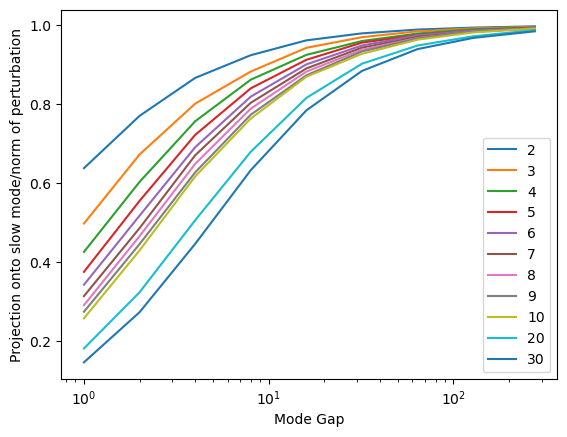

In [48]:
for i in range(len(resn)):
    plt.plot(-2/res_rats,resn[i],label = ns[i])
plt.xscale('log')
plt.ylabel('Projection onto slow mode/norm of perturbation')
plt.xlabel('Mode Gap')

plt.legend()